In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Final_Cleaned.csv', encoding='utf-8', sep=';')
df['property_type']= df['property_type'].replace("Ejerlejlighed", "Apartment")

In [132]:
df

,price,city,energy,area,land area,rooms,ejerudg,days active,latitude,longitude,...,distance to Odense,distance to city,closest city,residents,municipal,municipal tax rate,grundskyldspromille,property_type,sqm_price,Age
0,5195000.0,Valby,D,82.0,563.0,5.0,4894.0,87.0,55.652068,12.498816,...,136.137958,5.126456,Copenhagen,644431.0,Københavns,23.70,34.00,Villa,63353.658537,73.0
1,2595000.0,Sommersted,D,192.0,20011.0,7.0,2077.0,6.0,55.359367,9.255736,...,72.075634,72.075634,Odense,55340.0,Haderslev,26.30,24.36,Villa,13515.625000,93.0
2,3495000.0,Greve,D,116.0,794.0,4.0,3725.0,33.0,55.580640,12.286512,...,121.572639,20.688457,Copenhagen,50818.0,Greve,24.42,16.94,Villa,30129.310345,57.0
3,4500000.0,Borup,B,159.0,833.0,5.0,2862.0,229.0,55.492244,11.986446,...,101.536701,42.015572,Copenhagen,61718.0,Køge,25.26,21.04,Villa,28301.886792,15.0
4,1245000.0,Fredericia,D,157.0,1075.0,6.0,2101.0,105.0,55.540579,9.610832,...,51.888689,51.888689,Odense,51606.0,Fredericia,25.50,26.00,Villa,7929.936306,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26522,1695000.0,Hovedgård,C,78.0,828.0,2.0,1816.0,174.0,55.947943,9.964381,...,67.034720,28.205003,Aarhus,94443.0,Horsens,25.39,22.56,Villa,21730.769231,73.0
26523,695000.0,Faaborg,D,144.0,1028.0,4.0,1610.0,404.0,55.234210,10.476905,...,18.842811,18.842811,Odense,51849.0,Faaborg-Midtfyn,26.10,22.85,Villa,4826.388889,75.0
26524,695000.0,Bagenkop,E,112.0,700.0,4.0,1278.0,174.0,54.747589,10.674032,...,74.437042,74.437042,Odense,12316.0,Langeland,26.30,24.57,Villa,6205.357143,62.0
26525,1750000.0,Aabybro,C,198.0,696.0,7.0,2146.0,174.0,57.160593,9.735930,...,200.602518,16.770336,Aalborg,38187.0,Jammerbugt,25.70,32.85,Villa,8838.383838,56.0


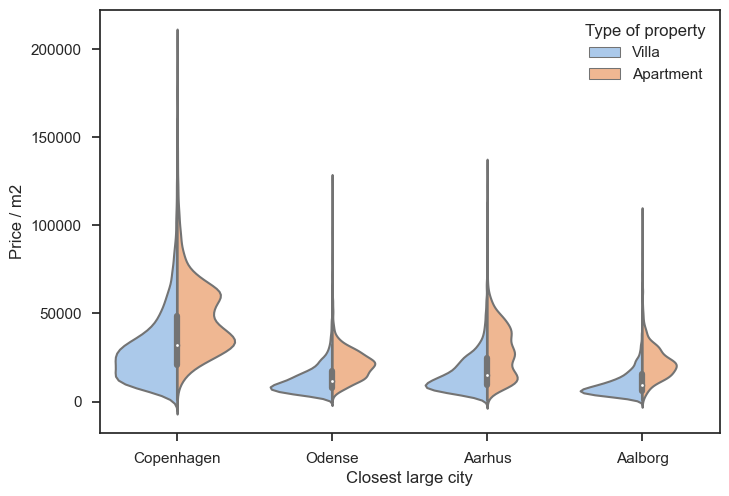

In [282]:
sns.set_palette("pastel")

Q1 = df['sqm_price'].quantile(0.05)
Q3 = df['sqm_price'].quantile(0.995)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outlier values
df_test = df[(df['sqm_price'] <= upper_bound)]

ax = sns.violinplot(x='closest city', y='sqm_price',hue='property_type', data=df_test,split=True)
ax.set_ylabel('Price / m2') # Choose title for plot
ax.set_xlabel('Closest large city') # Choose title for 'plot'
ax.legend(title="Type of property")

plt.savefig('price_per_m2_plot_new.png')

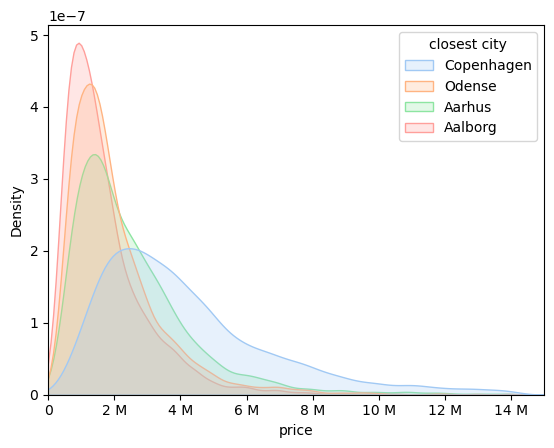

In [22]:
Q1 = df['price'].quantile(0.05)
Q3 = df['price'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outlier values
df_test = df[(df['price'] <= upper_bound)]

# Format y-axis labels with thousand separators
formatter = mticker.FuncFormatter(lambda x, pos: '{:.0f} M'.format(x / 1000000) if x >= 1000000 else '{:,.0f}'.format(x).replace(',', '.'))


fig, ax = plt.subplots()
sns.kdeplot(df_test, x="price", hue="closest city", fill=True,common_norm=False)
ax.set_xlim(0, 15000000)

ax.xaxis.set_major_formatter(formatter)
#ax.legend(title="Type of property")

#plt.savefig('price_density.png')

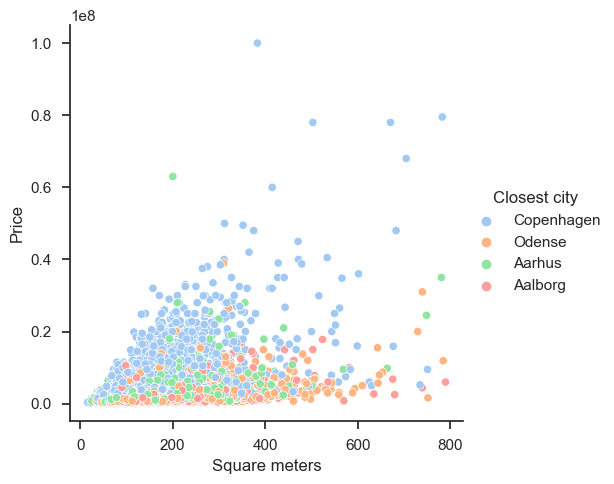

In [294]:
df_sup = df[df['closest city']=='Copenhagen']


# Create a new column indicating whether 'a' is present
df['Near Copenhagen'] = df['closest city'].str.contains('Copenhagen')

# Set up the relplot with hue parameter
ax = sns.relplot(data=df, x="area", y="price", hue="closest city")
ax.set_axis_labels("Square meters", "Price")
# Choose title for 'plot'
ax._legend.set_title("Closest city")

plt.savefig('price_to_m2.png')

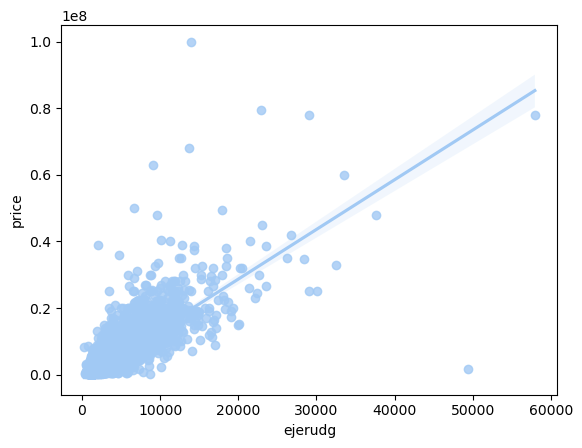

In [62]:
ax = sns.regplot(data=df, x="ejerudg", y="price")

#ax = sns.catplot(data=df, x="municipal tax rate", y="price", kind="bar",errorbar=('ci',0))

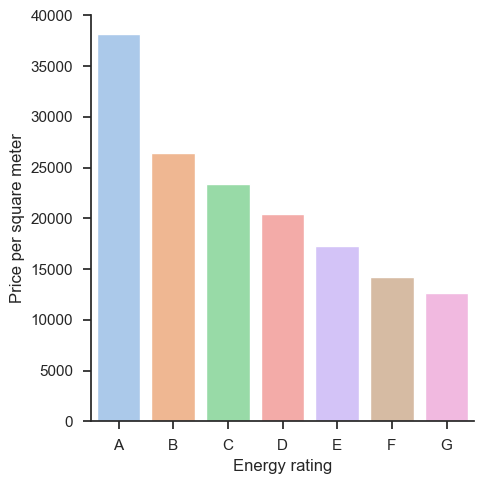

In [303]:


# Define the desired order of categories
desired_order = ['A', 'B', 'C','D','E','F','G']

# Set the categorical column with desired order
df['energy'] = pd.Categorical(df['energy'], categories=desired_order, ordered=True)

# Create the sorted bar plot
ax = sns.catplot(data=df, x="energy", y="sqm_price", kind="bar",errorbar=('ci',0))

# Set custom axis labels
ax.set_axis_labels("Energy rating", "Price per square meter")

plt.savefig('price_to_energy.png')

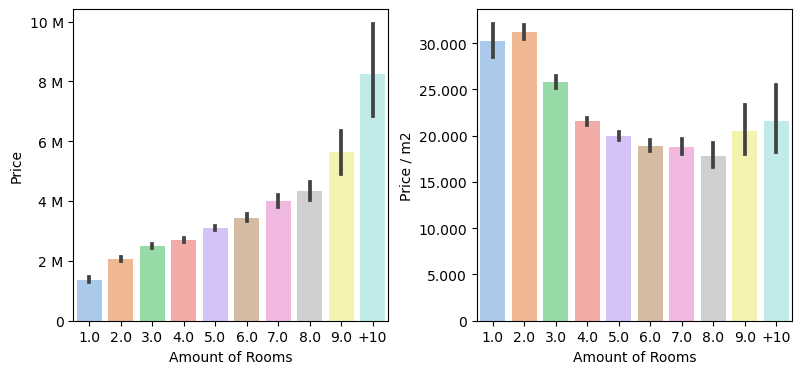

In [5]:
import matplotlib.ticker as mticker
# Custom function to transform values
def transform_values(value):
    if float(value) <= 10:
        return value
    else:
        return '+10'
sns.set_palette("pastel")
df_rooms = df

df_rooms['rooms'] = df['rooms'].astype(str)

# Apply the custom function to the 'values' column
df_rooms['rooms_group'] = df_rooms['rooms'].apply(transform_values)
# Define the desired order of categories
desired_order = ['1.0', '2.0', '3.0','4.0','5.0','6.0','7.0','8.0','9.0','+10']

# Set the categorical column with desired order
df_rooms['rooms_group'] = pd.Categorical(df_rooms['rooms_group'], categories=desired_order, ordered=True)

# Create the bar plot
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(data=df_rooms, x="rooms_group", y="price",estimator=np.mean,ax=ax[0])
sns.barplot(data=df_rooms, x="rooms_group", y="sqm_price",estimator=np.mean,ax=ax[1])

ax[0].set_xlabel('Amount of Rooms') # Choose title for plot
ax[1].set_xlabel('Amount of Rooms') # Choose title for plot

ax[0].set_ylabel('Price') # Choose title for plot
ax[1].set_ylabel('Price / m2') # Choose title for plot
ax[0].xaxis.label.set_fontsize(10)
ax[1].xaxis.label.set_fontsize(10)
# Adjust the layout to make room for y-label on the right
plt.subplots_adjust(right=0.85)

# Create space for the y-label on the right
f.tight_layout(rect=[0, 0, 0.8, 1])


# Format y-axis labels with thousand separators
formatter = mticker.FuncFormatter(lambda x, pos: '{:.0f} M'.format(x / 1000000) if x >= 1000000 else '{:,.0f}'.format(x).replace(',', '.'))
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

plt.savefig('price_to_rooms.png')